# ResNet50 on Cifar10 dataset

#### Importing necessary libraries

In [0]:
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3,VGG16,ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras.utils import to_categorical

#### Loading the Dataset and performing inbuilt pre-processing

In [0]:
from keras.datasets import mnist,fashion_mnist,cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train).astype(int)
y_test = to_categorical(y_test).astype(int)
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


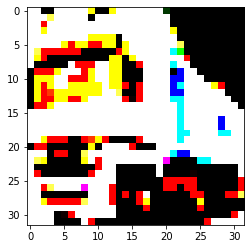

In [4]:
plt.imshow(x_train[1])

#### Function to resize the input image
    - Intitial size : (32x32)
    - Final size : (100x100)

In [0]:
def resize_data(data):
  data_upscaled = []
  for i, img in enumerate(data):
    large_img = cv2.resize(img, dsize=(100, 100))
    data_upscaled.append(large_img)
  return data_upscaled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


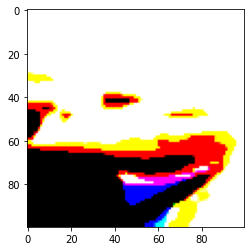

In [6]:
x_train = np.array(resize_data(x_train))
x_test = np.array(resize_data(x_test)) 
plt.imshow(x_test[1])

In [7]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50000, 100, 100, 3) (10000, 100, 100, 3) (50000, 10) (10000, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


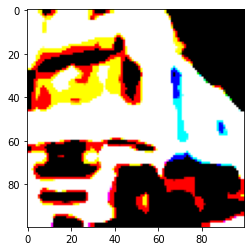

In [8]:
x_test.mean()
plt.imshow(x_train[1])

#### Model Building

In [9]:
base = ResNet50(include_top = False,weights='imagenet',input_shape = (100,100,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


#### Freezing the layers of base model

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              8392704   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 32,021,386
Trainable params: 8,433,674
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
model.fit(x_train,y_train,epochs=10,batch_size=500,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 139s 3ms/step - loss: 1.6231 - accuracy: 0.6673 - val_loss: 0.8539 - val_accuracy: 0.7374
Epoch 2/10
50000/50000 [==============================] - 128s 3ms/step - loss: 0.6677 - accuracy: 0.7719 - val_loss: 0.7330 - val_accuracy: 0.7819
Epoch 3/10
50000/50000 [==============================] - 128s 3ms/step - loss: 0.5352 - accuracy: 0.8152 - val_loss: 1.3160 - val_accuracy: 0.6935
Epoch 4/10
50000/50000 [==============================] - 128s 3ms/step - loss: 0.4377 - accuracy: 0.8473 - val_loss: 0.9759 - val_accuracy: 0.7590
Epoch 5/10
50000/50000 [==============================] - 128s 3ms/step - loss: 0.3681 - accuracy: 0.8708 - val_loss: 1.2458 - val_accuracy: 0.7268
Epoch 6/10
50000/50000 [==============================] - 128s 3ms/step - loss: 0.2983 - accuracy: 0.8960 - val_loss: 1.0321 - val_accuracy: 0.7706
Epoch 7/10
50000/50000 [==============================] - 128s

#### Performance Evaluation

In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss,label_ranking_loss
y_pred = model.predict(x_test)

In [15]:
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [16]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.7069655724579663
Precision for class 1 = 0.9679767103347889
Precision for class 2 = 0.940099833610649
Precision for class 3 = 0.6774941995359629
Precision for class 4 = 0.776158940397351
Precision for class 5 = 0.8183856502242153
Precision for class 6 = 0.98
Precision for class 7 = 0.562200956937799
Precision for class 8 = 0.8803512623490669
Precision for class 9 = 0.5715123094958968
Mean Precision =  0.7881145435343696


In [17]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.883
Recall for class 1 = 0.665
Recall for class 2 = 0.565
Recall for class 3 = 0.584
Recall for class 4 = 0.586
Recall for class 5 = 0.73
Recall for class 6 = 0.49
Recall for class 7 = 0.94
Recall for class 8 = 0.802
Recall for class 9 = 0.975
Mean Recall =  0.7219999999999999


In [18]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  9.069882681303552
